In [15]:
import pandas as pd
import matplotlib.pyplot as plt
url = "https://www.basketball-reference.com/leagues/NBA_2024_advanced.html"
tables = pd.read_html(url)
df = tables[0]

In [2]:
df.head()

,Rk,Player,Age,Team,Pos,G,GS,MP,PER,TS%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Awards
0,1.0,DeMar DeRozan,34.0,CHI,SF,79.0,79.0,2989.0,19.7,0.584,...,25.8,7.0,2.2,9.2,0.147,2.1,-0.3,1.8,2.8,CPOY-2
1,2.0,Domantas Sabonis,27.0,SAC,C,82.0,82.0,2928.0,23.2,0.637,...,22.2,8.6,4.0,12.6,0.206,4.0,2.4,6.5,6.2,"MVP-8,DPOY-10,NBA3"
2,3.0,Coby White,23.0,CHI,PG,79.0,78.0,2881.0,14.5,0.570,...,22.7,3.1,1.6,4.7,0.078,0.7,-1.3,-0.7,0.9,NaN
3,4.0,Mikal Bridges,27.0,BRK,SF,82.0,82.0,2854.0,14.9,0.560,...,24.3,2.1,2.1,4.2,0.070,0.7,-1.0,-0.4,1.2,NaN
4,5.0,Paolo Banchero,21.0,ORL,PF,80.0,80.0,2799.0,17.3,0.546,...,29.7,1.3,4.0,5.3,0.090,1.3,0.0,1.3,2.3,AS


In [3]:
df = df[df['Player'] != 'Player']
len(df)

736

In [16]:
addition_stats = ['G', 'GS', 'MP','OWS', 'DWS', 'WS']
averaged_stats = ['PER','TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']

agg_dict = {col: 'sum' for col in addition_stats}
agg_dict.update({col: 'mean' for col in averaged_stats})

df = df.groupby('Player', as_index=False).agg(agg_dict)

df

,Player,G,GS,MP,OWS,DWS,WS,PER,TS%,3PAr,...,AST%,STL%,BLK%,TOV%,USG%,WS/48,OBPM,DBPM,BPM,VORP
0,A.J. Green,56.0,0.0,614.0,0.7,0.3,1.1,10.5,0.617,0.862,...,6.4,0.7,0.6,5.5,15.2,0.084,-0.4,-1.7,-2.1,0.0
1,A.J. Lawson,42.0,0.0,311.0,0.0,0.3,0.2,11.2,0.519,0.413,...,8.9,1.5,0.8,9.6,20.0,0.036,-3.1,-1.5,-4.6,-0.2
2,AJ Griffin,20.0,0.0,171.0,-0.4,0.0,-0.4,1.2,0.382,0.629,...,3.7,0.3,1.1,11.3,17.3,-0.120,-6.0,-3.5,-9.6,-0.3
3,Aaron Gordon,73.0,73.0,2297.0,4.5,2.6,7.1,16.8,0.607,0.193,...,15.2,1.2,1.7,11.2,17.8,0.148,1.2,0.1,1.3,1.9
4,Aaron Holiday,78.0,1.0,1269.0,1.3,1.2,2.5,11.5,0.578,0.520,...,15.4,1.6,0.4,10.6,16.7,0.094,-1.8,0.3,-1.5,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,Zach LaVine,25.0,23.0,872.0,0.8,0.6,1.5,15.1,0.578,0.449,...,16.8,1.2,0.9,11.0,23.8,0.080,0.8,-0.7,0.1,0.5
569,Zavier Simpson,7.0,0.0,161.0,-0.3,0.2,-0.2,6.3,0.377,0.315,...,22.5,2.1,1.7,15.2,17.5,-0.046,-6.2,0.3,-5.9,-0.2
570,Zeke Nnaji,58.0,0.0,576.0,0.4,0.8,1.2,12.4,0.528,0.154,...,7.0,1.3,5.6,13.3,15.4,0.099,-3.8,0.1,-3.7,-0.2
571,Ziaire Williams,51.0,15.0,1038.0,-0.9,1.1,0.2,9.3,0.511,0.500,...,11.1,1.7,0.8,13.8,19.7,0.010,-4.0,-0.4,-4.5,-0.6


In [17]:
df_defense_stats = df[['Player','DRB%', 'STL%', 'BLK%', 'DWS', 'DBPM']].copy()
df_offense_stats = df[['Player','TS%','3PAr', 'FTr', 'ORB%', 'AST%', 'TOV%', 'USG%', 'OWS', 'OBPM']].copy()
df_overall_stats = df[['Player','PER', 'TRB%', 'WS', 'WS/48', 'BPM', 'VORP']].copy()
df_defense_stats.head()

,Player,DRB%,STL%,BLK%,DWS,DBPM
0,A.J. Green,9.6,0.7,0.6,0.3,-1.7
1,A.J. Lawson,12.6,1.5,0.8,0.3,-1.5
2,AJ Griffin,10.6,0.3,1.1,0.0,-3.5
3,Aaron Gordon,13.9,1.2,1.7,2.6,0.1
4,Aaron Holiday,8.5,1.6,0.4,1.2,0.3


In [23]:
def sort_defense(df_stats):
    stats = df_stats.copy()
    df_cols = ['DRB%', 'STL%', 'BLK%', 'DWS', 'DBPM']
    defense_key = {'DRB%':.1,'STL%':.1,'BLK%':.1,'DWS':.35,'DBPM':.35}
    for col in df_cols:
        stats[col] = ((stats[col] - stats[col].min()) / (stats[col].max() - stats[col].min()))

    stats['defense grade'] = sum(stats[col] * weight for col, weight in defense_key.items())
    return stats

def sort_offense(df_stats):
    stats = df_stats.copy()
    df_cols = ['TS%', 'ORB%', 'AST%', 'TOV%', 'USG%', 'OWS', 'OBPM']
    offense_key = {'TS%': .15, 'ORB%': .1, 'AST%': .15, 'TOV%': .2, 'USG%': .2, 'OWS': .1, 'OBPM': .1}
    for col in df_cols:
        normalized = ((stats[col] - stats[col].min()) / (stats[col].max() - stats[col].min()))
        if col == 'TOV%':
            normalized = 1 - normalized
        stats[col] = normalized

    stats['offense grade'] = sum(stats[col] * weight for col, weight in offense_key.items())
    return stats

def sort_overall(df_stats):
    stats = df_stats.copy()
    df_cols = ['PER', 'TRB%', 'WS', 'WS/48', 'BPM', 'VORP']
    offense_key = {'PER': .2, 'TRB%': .1, 'WS': .1, 'WS/48': .1, 'BPM': .2, 'VORP': .3}
    for col in df_cols:
        stats[col] = ((stats[col] - stats[col].min()) / (stats[col].max() - stats[col].min()))

    stats['overall grade'] = sum(stats[col] * weight for col, weight in offense_key.items())
    return stats


In [24]:
ovr_stats = sort_overall(df_overall_stats)
ranked_players = ovr_stats.sort_values(by='overall grade', ascending=False)
ranked_players.head()

,Player,PER,TRB%,WS,WS/48,BPM,VORP,overall grade
435,Nikola Jokić,0.675066,0.533693,1.000000,0.7072,0.582524,1.000000,0.775607
184,Giannis Antetokounmpo,0.660477,0.482480,0.796791,0.6648,0.524272,0.723577,0.648430
374,Luka Dončić,0.636605,0.363881,0.732620,0.6440,0.536755,0.788618,0.645307
502,Shai Gilgeous-Alexander,0.652520,0.245283,0.871658,0.6880,0.524272,0.715447,0.630487
394,Markquis Nowell,1.000000,0.741240,0.096257,1.0000,1.000000,0.138211,0.625213


In [20]:
def_stats = sort_defense(df_defense_stats)
ranked_defenders = def_stats.sort_values(by='defense grade', ascending=False)
ranked_defenders.head()


,Player,DRB%,STL%,BLK%,DWS,DBPM,defense grade
484,Rudy Gobert,0.686520,0.053476,0.352564,1.000000,0.452107,0.617494
435,Nikola Jokić,0.695925,0.106952,0.134615,0.879310,0.547893,0.593270
556,Victor Wembanyama,0.721787,0.106952,0.641026,0.758621,0.513410,0.592187
110,Daniel Gafford,0.525862,0.089127,0.461538,0.862069,0.468710,0.573425
28,Anthony Davis,0.665361,0.085561,0.365385,0.810345,0.452107,0.553489


In [22]:
off_stats = sort_offense(df_offense_stats)
ranked_offense = off_stats.sort_values(by='offense grade', ascending=False)
ranked_offense.head()

,Player,TS%,3PAr,FTr,ORB%,AST%,TOV%,USG%,OWS,OBPM,offense grade
394,Markquis Nowell,0.580153,0.000,2.000,1.000000,1.000000,1.000000,0.277241,0.172414,1.000000,0.709713
435,Nikola Jokić,0.708833,0.164,0.310,0.172542,0.735552,0.774081,0.404138,1.000000,0.578616,0.627417
374,Luka Dončić,0.672846,0.450,0.368,0.046382,0.775832,0.775832,0.496552,0.758621,0.563941,0.608673
502,Shai Gilgeous-Alexander,0.693566,0.181,0.436,0.055659,0.521891,0.852890,0.452414,0.896552,0.530398,0.591640
184,Giannis Antetokounmpo,0.707743,0.091,0.571,0.159555,0.572680,0.777583,0.455172,0.827586,0.530398,0.590368


In [54]:
# 3 dfs, ovr_stats, off_stats, def_stats

final_df = pd.concat([def_stats['Player'], def_stats['defense grade'], off_stats['offense grade'], ovr_stats['overall grade']], axis=1)
final_df = final_df.dropna(subset=['defense grade', 'offense grade', 'overall grade'])
final_df['combined score'] = (final_df['defense grade'] + final_df['offense grade'] + final_df['overall grade'])
final_df['rank'] = final_df['combined score'].rank(method='first', ascending=False).astype(int)

final_df.head()

,Player,defense grade,offense grade,overall grade,combined score,rank
0,A.J. Green,0.160907,0.403599,0.280021,0.844527,439
1,A.J. Lawson,0.176203,0.388651,0.269768,0.834621,448
2,AJ Griffin,0.122083,0.323475,0.202890,0.648447,551
3,Aaron Gordon,0.343673,0.454836,0.405074,1.203583,74
4,Aaron Holiday,0.242982,0.408896,0.296155,0.948033,305


In [35]:
ranked = final_df.sort_values(by='rank', ascending=True)
ranked

,Player,defense grade,offense grade,overall grade,combined score,rank
435,Nikola Jokić,0.593270,0.627417,0.775607,1.996295,1
394,Markquis Nowell,0.390568,0.709713,0.625213,1.725494,2
184,Giannis Antetokounmpo,0.479603,0.590368,0.648430,1.718401,3
502,Shai Gilgeous-Alexander,0.484651,0.591640,0.630487,1.706778,4
374,Luka Dončić,0.444770,0.608673,0.645307,1.698750,5
...,...,...,...,...,...,...
405,Maxwell Lewis,0.107407,0.222850,0.163110,0.493367,564
323,Kaiser Gates,0.036912,0.285241,0.071304,0.393457,565
234,Jalen Crutcher,0.030843,0.257451,0.097210,0.385504,566
309,Joshua Primo,0.083171,0.181193,0.092049,0.356413,567


In [55]:
salary_url = "https://www.basketball-reference.com/contracts/players.html"
salary_df = pd.read_html(salary_url)[0]
salary_df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0       Salary  \
                  Rk             Player                 Tm      2025-26   
0                  1      Stephen Curry                GSW  $59,606,817   
1                  2        Joel Embiid                PHI  $55,224,526   
2                  3       Nikola Jokić                DEN  $55,224,526   
3                  4       Kevin Durant                HOU  $54,708,609   
4                  5       Jayson Tatum                BOS  $54,126,450   

                                                               \
       2026-27      2027-28      2028-29      2029-30 2030-31   
0  $62,587,158          NaN          NaN          NaN     NaN   
1  $57,985,752  $62,624,612  $67,263,472          NaN     NaN   
2  $59,033,114  $62,841,702          NaN          NaN     NaN   
3          NaN          NaN          NaN          NaN     NaN   
4  $58,456,566  $62,786,682  $67,116,798  $71,446,914     NaN   

  Unnamed: 9_level_0  
          Guaranteed  
0       $122,193,975  
1       $175,834,890  
2       $114,257,640  
3        $54,708,609  
4       $242,486,496

In [56]:
salary_df.columns = [f'{lvl0} {lvl1}'.strip() for lvl0, lvl1 in salary_df.columns]

salary_df = salary_df.rename(columns={
    'Unnamed: 1_level_0 Player': 'Player',
    'Salary 2025-26': '2025-26'
})

salary_df['Player'] = salary_df['Player'].str.replace('*', '', regex=False).str.strip()
salary_df['2025-26'] = salary_df['2025-26'].replace('[\$,]', '', regex=True)
salary_df['2025-26'] = pd.to_numeric(salary_df['2025-26'], errors='coerce')



In [57]:
final_df = final_df.merge(salary_df[['Player', '2025-26']], on='Player', how='left')
final_df.rename(columns={'2025-26': '2025-26 Salary'}, inplace=True)

In [47]:
final_df['2025-26 Salary'] = final_df['2025-26 Salary'].fillna(1750000)
final_df.head()

,Player,defense grade,offense grade,overall grade,combined score,rank,2025-26 Salary
0,A.J. Green,0.160907,0.403599,0.280021,0.844527,439,2301587.0
1,A.J. Lawson,0.176203,0.388651,0.269768,0.834621,448,2270735.0
2,AJ Griffin,0.122083,0.323475,0.202890,0.648447,551,1750000.0
3,Aaron Gordon,0.343673,0.454836,0.405074,1.203583,74,22841455.0
4,Aaron Holiday,0.242982,0.408896,0.296155,0.948033,305,1750000.0


In [59]:
final_df['2025-26 Salary'] /= 1000000

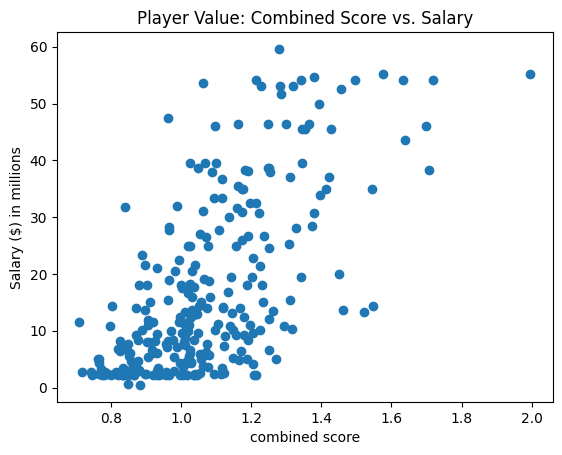

In [60]:


plt.scatter(final_df['combined score'], final_df['2025-26 Salary'])
plt.xlabel('combined score')
plt.ylabel('Salary ($) in millions')
plt.title('Player Value: Combined Score vs. Salary')
plt.show()